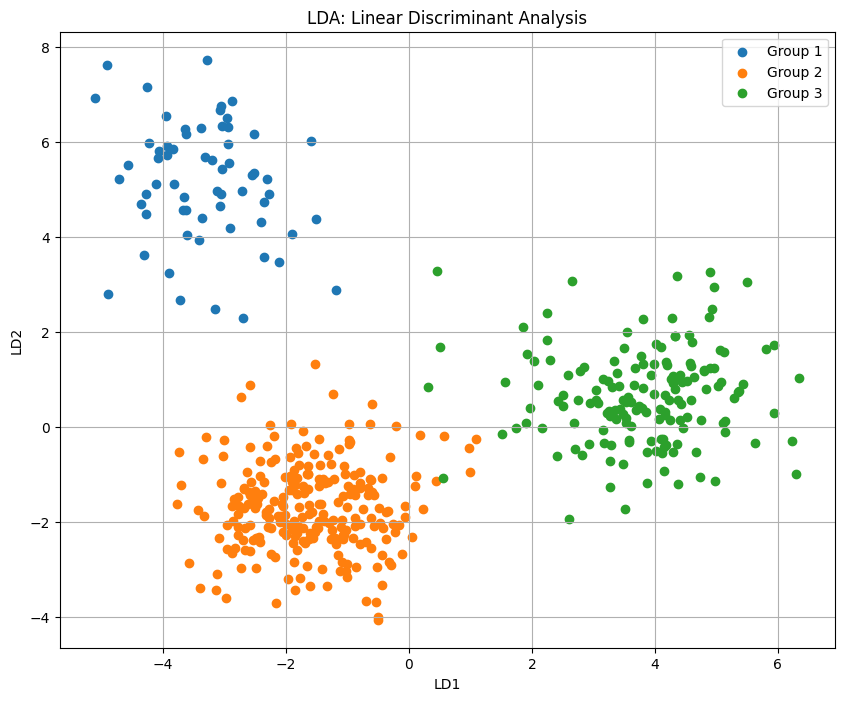

Cross-Validation Scores: [0.55319149 0.5106383  0.61702128 0.66666667 0.30107527]
Confusion Matrix:
 [[ 62   0   0]
 [  0 246   1]
 [  0   2 157]]
Classification Report:
               precision    recall  f1-score   support

     Group 1       1.00      1.00      1.00        62
     Group 2       0.99      1.00      0.99       247
     Group 3       0.99      0.99      0.99       159

    accuracy                           0.99       468
   macro avg       1.00      0.99      0.99       468
weighted avg       0.99      0.99      0.99       468

Cross-Validation Scores (PCA): [0.45744681 0.5212766  0.61702128 0.53763441 0.38709677]
Confusion Matrix (PCA):
 [[ 44  16   2]
 [  7 224  16]
 [  4  28 127]]
Classification Report (PCA):
               precision    recall  f1-score   support

     Group 1       0.80      0.71      0.75        62
     Group 2       0.84      0.91      0.87       247
     Group 3       0.88      0.80      0.84       159

    accuracy                           0.

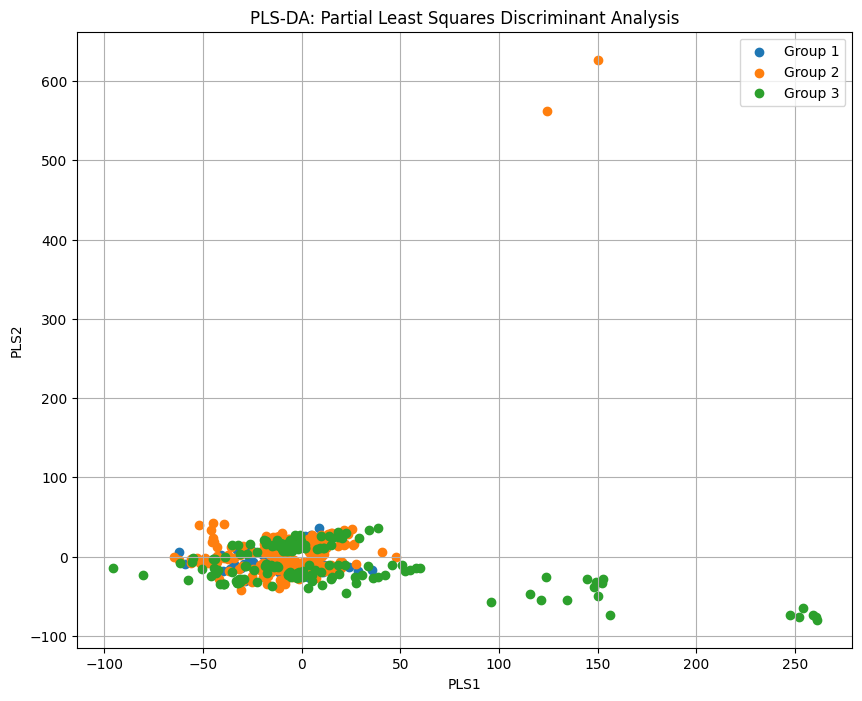

Best number of PLS components: 1


ValueError: Shape of passed values is (468, 1), indices imply (468, 2)

In [4]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = r"C:\Users\pingk\Downloads\fadhli nitip\asik_rt4_now with indo new_cleaned.csv"
data = pd.read_csv(file_path)

# Extracting features and labels
X = data.drop(columns=['prov_char', 'country_char', 'wavenumber', 'tgp_name', 'dgp_name', 'fgp_name', 'country_name', 'thnoth_name'])
y = data['tgp_name']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# Create a DataFrame for LDA results for visualization
lda_df = pd.DataFrame(data=X_lda, columns=['LD1', 'LD2'])
lda_df['Label'] = y

# Plotting LDA results
plt.figure(figsize=(10, 8))
for label in np.unique(y):
    plt.scatter(lda_df.loc[lda_df['Label'] == label, 'LD1'], lda_df.loc[lda_df['Label'] == label, 'LD2'], label=label)
plt.title('LDA: Linear Discriminant Analysis')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.grid(True)
plt.show()

# Perform cross-validation
skf = StratifiedKFold(n_splits=5)
lda_cv_scores = cross_val_score(lda, X_scaled, y, cv=skf)

# Predict using LDA for confusion matrix
y_pred = lda.predict(X_scaled)

# Create confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

# Classification report
class_report = classification_report(y, y_pred)

print("Cross-Validation Scores:", lda_cv_scores)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Reduce dimensionality using PCA
pca = PCA(n_components=50)  # Reducing to 50 components for faster computation
X_pca = pca.fit_transform(X_scaled)

# Perform LDA on the PCA-reduced data
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda_pca = lda.fit_transform(X_pca, y)

# Perform cross-validation
lda_cv_scores = cross_val_score(lda, X_pca, y, cv=skf)

# Predict using LDA for confusion matrix
y_pred = lda.predict(X_pca)

# Create confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

# Classification report
class_report = classification_report(y, y_pred)

print("Cross-Validation Scores (PCA):", lda_cv_scores)
print("Confusion Matrix (PCA):\n", conf_matrix)
print("Classification Report (PCA):\n", class_report)

# Perform PLS-DA
le = LabelEncoder()
y_encoded = le.fit_transform(y)

pls = PLSRegression(n_components=2)
X_pls = pls.fit_transform(X_scaled, y_encoded)[0]

# Create a DataFrame for PLS-DA results for visualization
pls_df = pd.DataFrame(data=X_pls, columns=['PLS1', 'PLS2'])
pls_df['Label'] = y

# Plotting PLS-DA results
plt.figure(figsize=(10, 8))
for label in np.unique(y):
    plt.scatter(pls_df.loc[pls_df['Label'] == label, 'PLS1'], pls_df.loc[pls_df['Label'] == label, 'PLS2'], label=label)
plt.title('PLS-DA: Partial Least Squares Discriminant Analysis')
plt.xlabel('PLS1')
plt.ylabel('PLS2')
plt.legend()
plt.grid(True)
plt.show()

# Optimizing PLS-DA Model
# Define the parameter grid
param_grid = {'n_components': list(range(1, 21))}

# Perform grid search with cross-validation
pls = PLSRegression()
grid_search = GridSearchCV(pls, param_grid, cv=5)
grid_search.fit(X_scaled, y_encoded)

# Best number of components
best_n_components = grid_search.best_params_['n_components']
print("Best number of PLS components:", best_n_components)

# Fit the optimized PLS-DA model
pls_opt = PLSRegression(n_components=best_n_components)
X_pls_opt = pls_opt.fit_transform(X_scaled, y_encoded)[0]

# Create a DataFrame for optimized PLS-DA results for visualization
pls_opt_df = pd.DataFrame(data=X_pls_opt, columns=['PLS1', 'PLS2'])
pls_opt_df['Label'] = y

# Plotting optimized PLS-DA results
plt.figure(figsize=(10, 8))
for label in np.unique(y):
    plt.scatter(pls_opt_df.loc[pls_opt_df['Label'] == label, 'PLS1'], pls_opt_df.loc[pls_opt_df['Label'] == label, 'PLS2'], label=label)
plt.title('Optimized PLS-DA: Partial Least Squares Discriminant Analysis')
plt.xlabel('PLS1')
plt.ylabel('PLS2')
plt.legend()
plt.grid(True)
plt.show()

# Changing LDA Target to 'thnoth_name'
y_new = data['thnoth_name']

# Perform LDA with new target
lda_new = LinearDiscriminantAnalysis(n_components=2)
X_lda_new = lda_new.fit_transform(X_scaled, y_new)

# Create a DataFrame for LDA results with new target
lda_df_new = pd.DataFrame(data=X_lda_new, columns=['LD1', 'LD2'])
lda_df_new['Label'] = y_new

# Plotting LDA results with new target
plt.figure(figsize=(10, 8))
for label in np.unique(y_new):
    plt.scatter(lda_df_new.loc[lda_df_new['Label'] == label, 'LD1'], lda_df_new.loc[lda_df_new['Label'] == label, 'LD2'], label=label)
plt.title('LDA: Linear Discriminant Analysis with New Target')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.grid(True)
plt.show()